## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\abdul\CareerFoundry-Assignment-06'

In [4]:
df = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'airport_clean_updated.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Index', 'Origin_airport', 'Destination_airport',
       'Origin_city', 'Destination_city', 'Passengers', 'Seats', 'Flights',
       'Distance', 'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long', 'Fly_year', 'Fly_month', 'Fly_day',
       'Fly_year_month', 'Distance_Category', 'Fly_year_Category'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,...,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category
0,0,1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,...,44.124599,-123.211998,44.254101,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994
1,1,2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,...,44.124599,-123.211998,44.254101,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994
2,2,3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,...,44.124599,-123.211998,44.254101,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994
3,3,4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,...,42.374199,-122.873001,44.254101,-121.150002,1990,2,1,1990-02,Short Distance,1990-1994
4,4,5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,...,42.374199,-122.873001,44.254101,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994


In [7]:
df.shape

(3594452, 23)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                0
Index                     0
Origin_airport            0
Destination_airport       0
Origin_city               0
Destination_city          0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly_date                  0
Origin_population         0
Destination_population    0
Org_airport_lat           0
Org_airport_long          0
Dest_airport_lat          0
Dest_airport_long         0
Fly_year                  0
Fly_month                 0
Fly_day                   0
Fly_year_month            0
Distance_Category         0
Fly_year_Category         0
dtype: int64

##### Extreme values checks

C:\Users\abdul\AppData\Local\Temp/ipykernel_18640/3151222749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Seats'], bins=25) # Shows extreme values


<AxesSubplot:xlabel='Seats', ylabel='Density'>

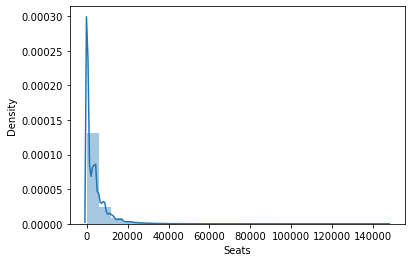

In [9]:
sns.distplot(df['Seats'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [10]:
df['Seats'].mean() # Check the mean

4060.3333629159606

In [11]:
df['Seats'].median() # Check the median

2016.0

In [12]:
df['Seats'].max() # Check the max

147062

In [13]:
df['Seats'].min() # Check the min

0

In [14]:
# Select only entries with a non-zero rating

df = df[df['Seats'] >0]

In [15]:
df.shape

(3264478, 23)

### 3. Data prep for regression analysis 

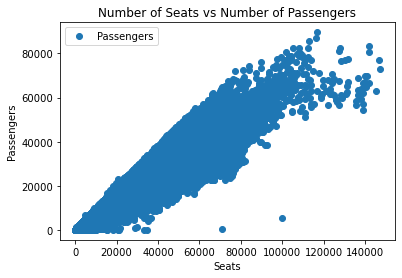

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Seats', y='Passengers',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Seats vs Number of Passengers')  
plt.xlabel('Seats')  
plt.ylabel('Passengers')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Seats'].values.reshape(-1,1)
y = df['Passengers'].values.reshape(-1,1)

In [18]:
X

array([[ 396],
       [ 342],
       [  72],
       ...,
       [1026],
       [1273],
       [  19]], dtype=int64)

In [19]:
y

array([[ 41],
       [ 88],
       [ 11],
       ...,
       [245],
       [363],
       [  2]], dtype=int64)

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

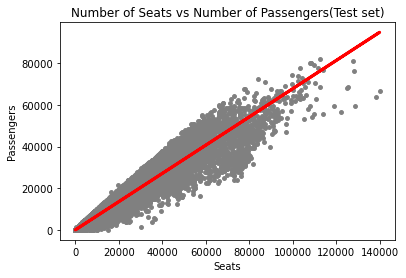

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Seats vs Number of Passengers(Test set)')
plot_test.xlabel('Seats')
plot_test.ylabel('Passengers')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.67999881]]
Mean squared error:  1216633.0708155883
R2 score:  0.9390106184304964


In [27]:
y_predicted

array([[ 847.58613104],
       [3873.58082528],
       [2565.26311928],
       ...,
       [1256.94541327],
       [4131.98037221],
       [ 227.42721842]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1076,847.586131
1,4934,3873.580825
2,1817,2565.263119
3,4048,4019.100570
4,535,847.586131
5,1811,3028.342307
6,1754,2309.583568
7,3020,2631.223004
8,529,438.226849
9,125,30.227564


##### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.67999881]]
Mean squared error:  1248568.642680149
R2 score:  0.9378599651916066


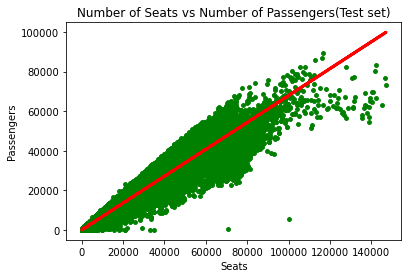

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Seats vs Number of Passengers(Test set)')
plot_test.xlabel('Seats')
plot_test.ylabel('Passengers')
plot_test.show()